# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 



План работ:

- Предобработка данных:
    - поиск и замена пропусков
    - преобразование типов данных в столбцах
    - устранение неявных дубликатов
    - устранение редких и выбивающихся значений
    - добавление в таблицу новых столбцов с требуемыми параметрами
- Исследовательский анализ данных:
    - изучение параметров объектов
    - изучение, как быстро продавались квартиры
    - какие факторы больше всего влияют на общую (полную) стоимость объекта
    - вычисление средней цены 1 кв. м. в 10 населённых пунктах с наибольшим числом объявлений
    - вычисление средней цены каждого километра по удаленности от Санкт-Петербурга
- Общий вывод

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# подключаем библиотеки
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# считываем файл
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#изучаем данные
display(data.head())
display(data.tail())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#изучаем данные
data.info()
# в некоторых колонках многовато пропусков
# есть неправильные типы колонок

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
#изучаем данные
data.describe()
#есть подозрительные столбцы с большим стд.отклонением: last_price, total_area, living_area, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest, days_exposition

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


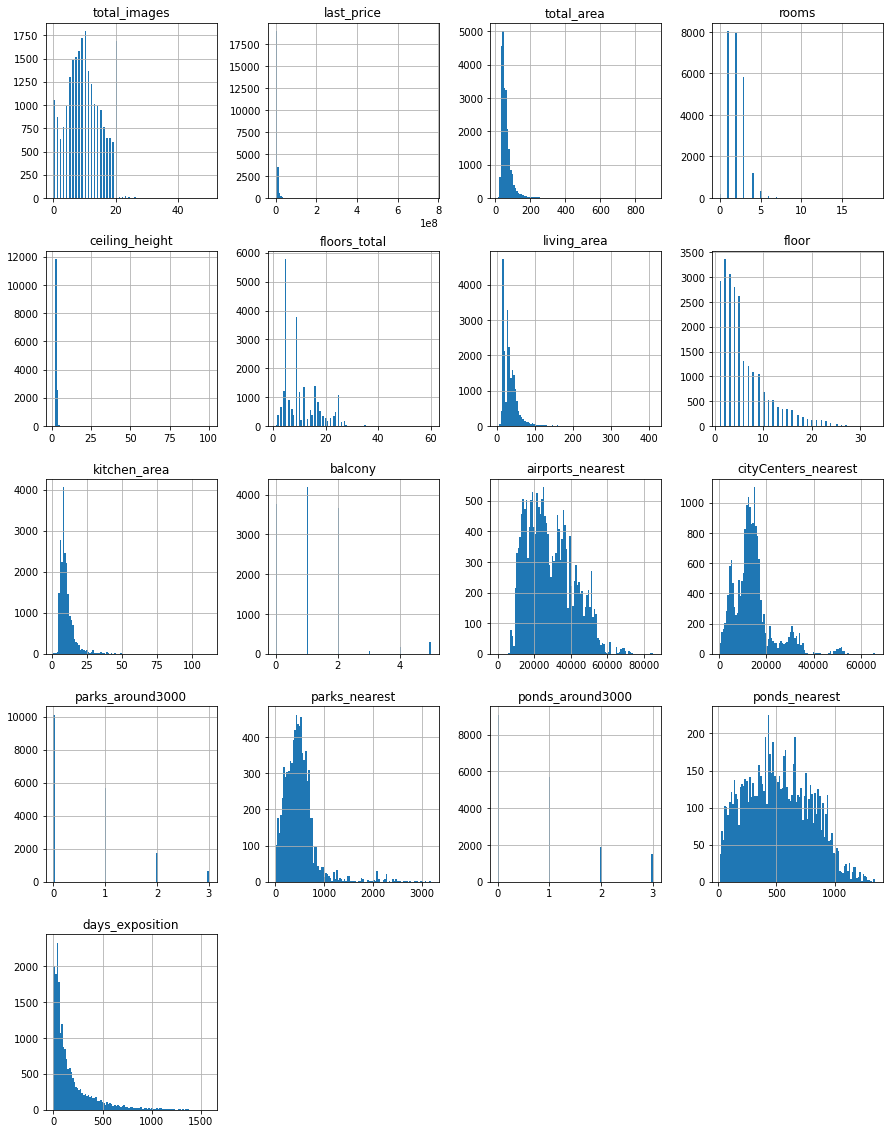

In [6]:
#изучаем данные
data.hist(bins=100, figsize=(15, 20));
#на некоторых графиках виднеются шумы

По полученным данным видно, что с данными не так всё гладко, как хотелось бы: имеются пропуски и выбивающиеся значения. Формат времени тоже не устраивает. Придется заниматься предобработкой данных.

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах:

In [7]:
# поиск пропусков
data.isna().sum()

# итого 14 столбцов с пропусками

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [8]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

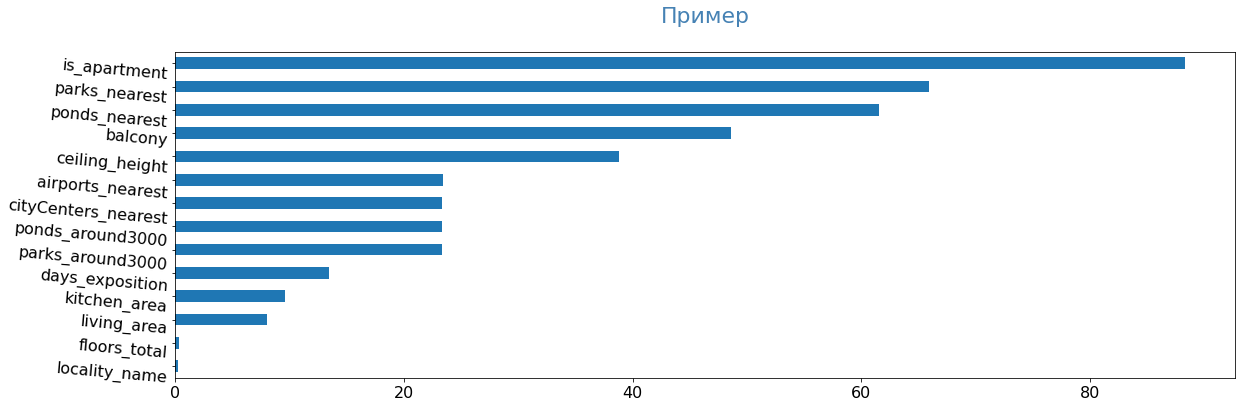

In [9]:
pass_value_barh(data)

In [10]:
# работа с пропусками

data['balcony'] = data['balcony'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
data = data.dropna(subset = ['floors_total'])
data=data.dropna(subset=['locality_name'])
#заменила на нули в тех столбцах, где показалось, что можно это сделать
#убрала тогда строчки с медианной в потолках


обработала столбец floors_total, ну и по той же логике еще столбец locality_name

In [11]:
# проверим как обработали пропуски    
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Про пропуски:
Полагаю, что пропуски образовались из-за переноса данных, либо просто тот, кто составлял таблицу, подумал "про себя", что пропуски - это по умолчанию ноль (столбец "балконы") или False в столбце "апартменты ли". Геоданные, мне кажется трогать смысла нет - там не угадаешь. 

#### Рассмотрите типы данных в каждом столбце:

In [12]:
#преобразование типов данных в столбцах
data.info()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['is_apartment'] = data['is_apartment'].astype('bool')
data['floors_total'] = data['floors_total'].astype('int64')  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [13]:
#проверим как поменялись типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

изменение типов данных в столбцах : "первый день показа" и "апартаменты ли" необходимо для дальнейшей возможности эти данные обрабатывать и для корректного отображения.

#### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты.

In [14]:
#поиск неявных дубликатов в столбце населенного пункта
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [15]:
# то, что увидела - попытаемся поменять
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('городской поселок', 'поселок')
data['locality_name'] = data['locality_name'].str.replace('коттеджный поселок', 'поселок')


In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

дубликаты обработаны

#### Найдите и устраните редкие и выбивающиеся значения.

для начала проверим столбцы, которые вызвали подозрение в самом начале при изучении данных

In [17]:
#найдем редкие и выбивающиеся значения, начнем с потолков
#data['ceiling_height'].value_counts()
data['ceiling_height'].unique()
for i in data['ceiling_height'].unique():
    data.loc[data['ceiling_height'] >10, 'ceiling_height'] = i/10
data['ceiling_height'].value_counts()
# проверила, на 10 значений сократилась длина, значит получилось


2.50    3515
2.60    1645
2.70    1571
3.00    1108
2.80     988
        ... 
4.90       1
2.89       1
5.20       1
2.49       1
4.65       1
Name: ceiling_height, Length: 173, dtype: int64

count    14481.000000
mean         2.723451
std          0.310109
min          0.270000
25%          2.510000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

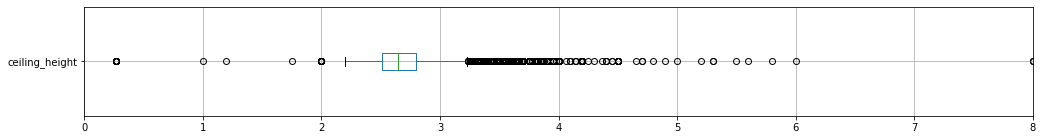

In [18]:
# построим еще боксплот посмотреть
data.boxplot('ceiling_height', vert = False, figsize=(17,2)).set(xlim=(0,8))
data['ceiling_height'].describe()

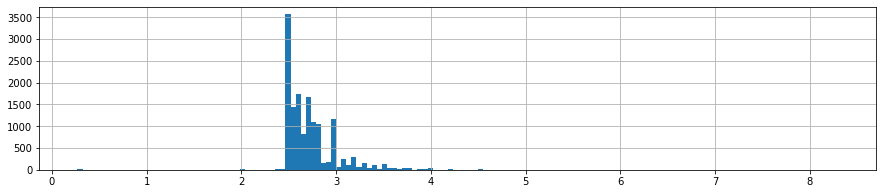

In [19]:
# построю еще гистограмму для наглядности
data.ceiling_height.hist(bins=150, figsize=(15,3));

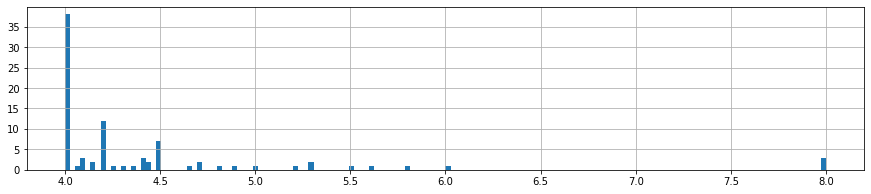

In [20]:
# и еще одну с потолками от 4 до 8
data.ceiling_height.hist(bins=150, figsize=(15,3), range=(4,8));

In [21]:
# проверка для себя чтобы понять как включить пропуски
len(data[data['ceiling_height']>7])

4

In [22]:
# проверка для себя
len(data[data['ceiling_height']<1])

25

In [23]:
# немного подчистим данные с учетом пропусков
data = data.query('1<ceiling_height<7 | ceiling_height.isna()')           

In [24]:
# проверка
len(data)

23535

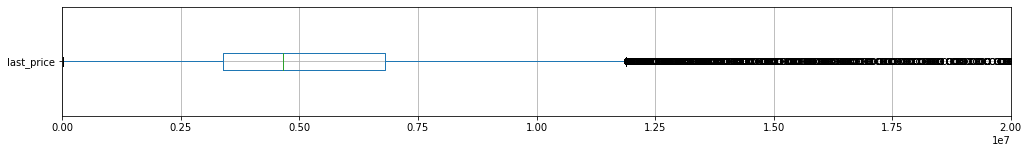

count    2.353500e+04
mean     6.542151e+06
std      1.091731e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [25]:
# дальше смотрим цену

graph = data.boxplot(column=['last_price'], vert=False, figsize=(17,2))
graph.set(xlim=(0,20000000))
plt.show()
data['last_price'].describe()
#видно, что можно почистить


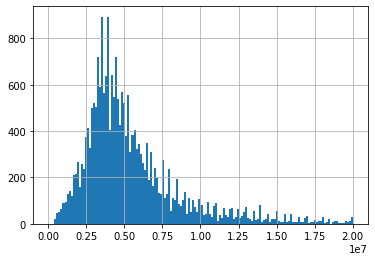

In [26]:
#посмотрим еще
data['last_price'].hist(bins=150, range=(0,20000000));

# длинный хвост - хочется удалить и что-то непонятное около нуля

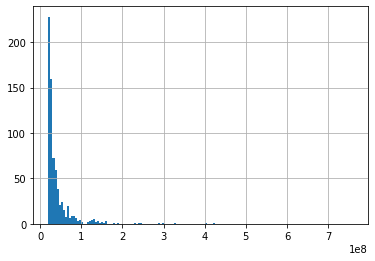

In [27]:
# посмотрим кол-во свыше 20 млн
data['last_price'].hist(bins=150, range=(20000000, 760000000));

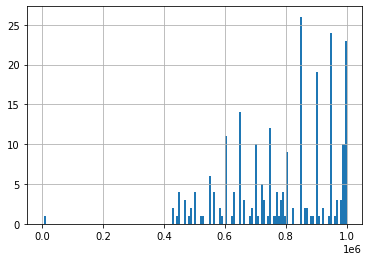

In [28]:
# и меньше 1 млн посмотрим
data['last_price'].hist(bins=150, range=(0, 1000000));

In [29]:
# для начала посчитаем перед удалением
#len(data[data['last_price']<1000000])/len(data)*100

#мне кажется 1 проц удалить нормально с краев

len(data[data['last_price']>40000000])/len(data)*100


0.769067346505205

In [30]:
# удалим выбросы и посмотрим
data = data.query('1000000<last_price < 40000000')
data['last_price'].describe()
    

count    2.309700e+04
mean     5.946850e+06
std      4.547609e+06
min      1.010000e+06
25%      3.450000e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.999000e+07
Name: last_price, dtype: float64

In [31]:
data.shape[0]

23097

count    23097.000000
mean        59.041242
std         29.995640
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        470.300000
Name: total_area, dtype: float64

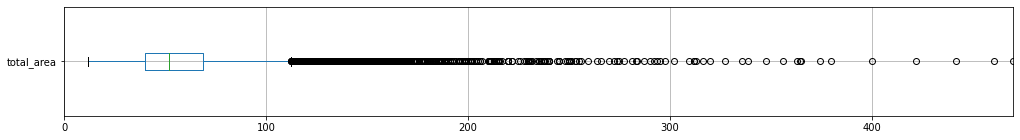

In [32]:
# проверяем по анаолгии столбец с общей площадью
data.boxplot('total_area', vert=False, figsize=(17,2)).set(xlim=(0,470))
data['total_area'].describe()
#можно немного подчистить

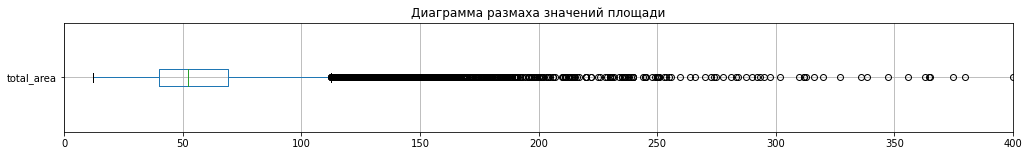

In [33]:
# check
# для примера горизонтальный вид диаграммы размаха

fig, ax = plt.subplots(figsize = (17,2))
ax = data[['total_area']].boxplot(vert = False, ax =ax)
ax.set_title('Диаграмма размаха значений площади')
ax.set_xlim(0, 400);

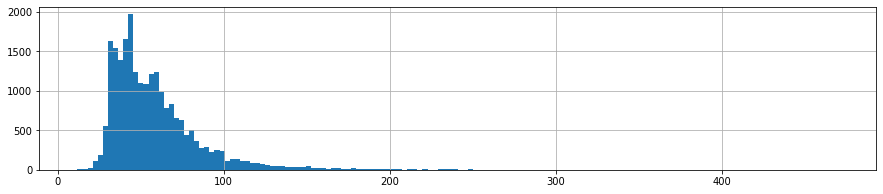

In [34]:
data['total_area'].hist(bins=150,figsize=(15,3));
#по графикам видно, что после 200  очень редко что-то пробегает

In [35]:
len(data[data['total_area']>200])

127

In [36]:
#удалим выбросы
data = data.query('total_area < 200')
data['total_area'].describe()

count    22967.000000
mean        57.932291
std         25.845750
min         12.000000
25%         40.000000
50%         52.000000
75%         68.700000
max        199.200000
Name: total_area, dtype: float64

count    21185.000000
mean        33.134172
std         17.129067
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

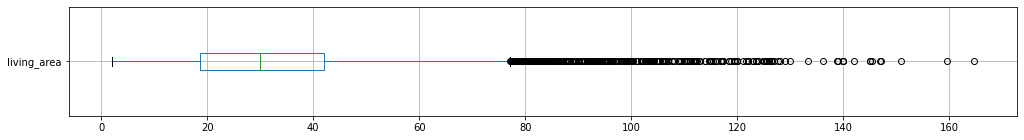

In [37]:
# проверяем по анаолгии столбец с жилой площадью
data.boxplot('living_area', vert=False, figsize=(17,2))
data['living_area'].describe()


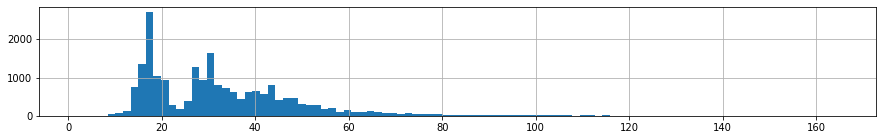

In [38]:
data['living_area'].hist(bins=100, figsize=(15,2));

In [39]:
#перепроверим
#len(data[data['living_area']>150])
len(data[data['living_area']<10])

24

In [40]:
# check
len(data)

22967

In [41]:
# удалим выбросы 
data = data.query('10 < living_area < 150 | living_area.isna()')
data['living_area'].describe()

count    21127.000000
mean        33.179459
std         17.042257
min         10.080000
25%         18.600000
50%         30.000000
75%         42.000000
max        147.200000
Name: living_area, dtype: float64

In [42]:
#check
len(data)

22909

count    19877.000000
mean       179.364139
std        218.464045
min          1.000000
25%         44.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

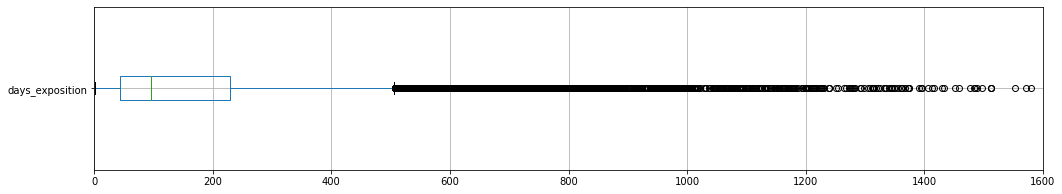

In [43]:
#посмотрим колонку дней размещения объявления
data.boxplot('days_exposition', vert=False, figsize=(17,3)).set(xlim=(0,1600))
data['days_exposition'].describe()


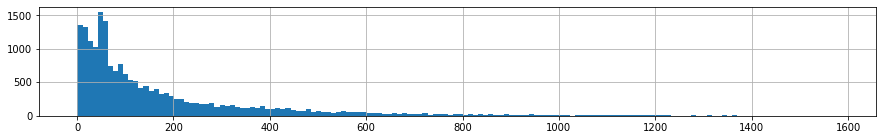

In [44]:
data['days_exposition'].hist(bins=150, figsize=(15,2));

In [45]:
# check
len(data[data['days_exposition']>1200])/len(data)

0.0037539831507267885

In [46]:
#удалим выбросы
data = data.query('days_exposition < 1200 | days_exposition.isna()')
data['days_exposition'].describe()

count    19790.000000
mean       174.310157
std        205.081773
min          1.000000
25%         44.000000
50%         94.000000
75%        225.000000
max       1199.000000
Name: days_exposition, dtype: float64

In [47]:
len(data)

22822

Итого: среднее в столбце со стоимостью уменьшилось с 6,5 млн до 5,9. Общая площадь с 60 до 58. Жилая площадь с 34 до 33. Дни объявлений с 180 до 174.

Далее буду проделывать всё то же самое с другими столбцами, комментировать, думаю смысла не имеет. Буду смотреть выбросы по ящику с усами и удалять их

In [48]:
# check
data.shape[0]

22822

count    22822.000000
mean         2.032425
std          0.991794
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

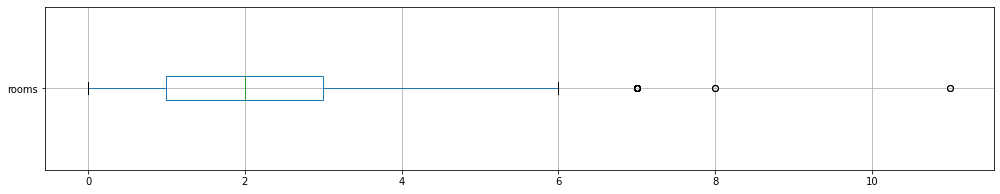

In [49]:
#проверим все оставшиеся столбцы, начиная с комнат
data.boxplot('rooms', vert=False, figsize=(17,3))
data['rooms'].describe()

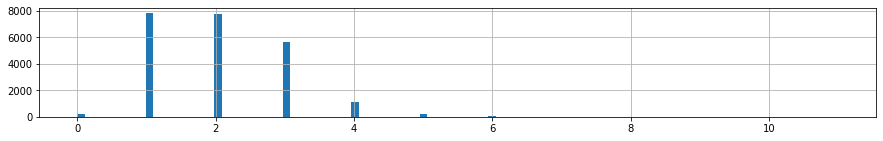

In [50]:
data['rooms'].hist(bins=100, figsize=(15,2));

In [51]:
#check
len(data[data['rooms']>6])

24

In [52]:
#удалим выбросы
data = data.query('rooms < 6')

In [53]:
# check
data.shape[0]

22742

count    22742.000000
mean        10.819101
std          6.608322
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

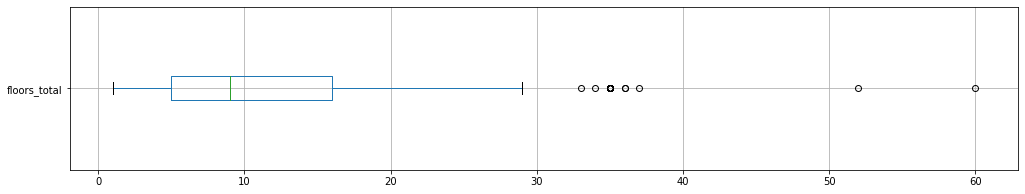

In [54]:
# столбец этажи в доме
data.boxplot('floors_total', vert=False, figsize=(17,3))
data['floors_total'].describe()

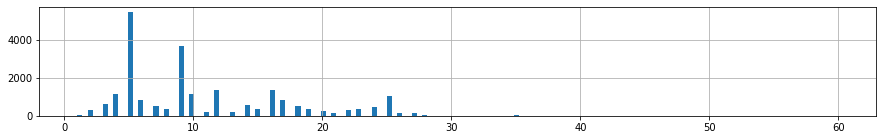

In [55]:
data['floors_total'].hist(bins=150, figsize=(15,2));

In [56]:
# check
data.shape[0]

22742

In [57]:
# check
len(data[data['floors_total']>30])

31

In [58]:
#удалим выбросы
data = data.query('floors_total<30')

count    22711.000000
mean         5.919158
std          4.869994
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

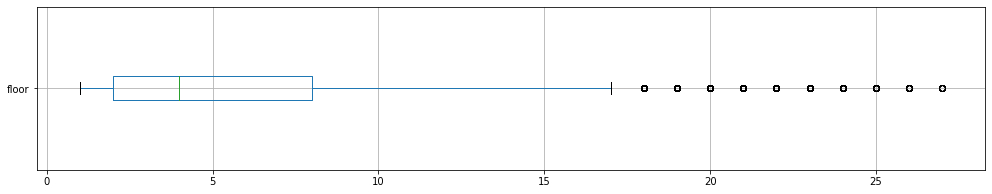

In [59]:
#этаж
data.boxplot('floor', vert=False, figsize=(17,3))
data['floor'].describe()

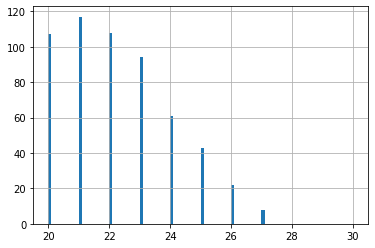

In [60]:
data['floor'].hist(bins=100,range=(20,30));

In [61]:
# check
len(data[data['floor']>25])

30

In [62]:
data=data.query('floor<25')

In [63]:
data.shape[0]

22638

##### check r.1.1

In [64]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22638 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22638 non-null  int64         
 1   last_price            22638 non-null  float64       
 2   total_area            22638 non-null  float64       
 3   first_day_exposition  22638 non-null  datetime64[ns]
 4   rooms                 22638 non-null  int64         
 5   ceiling_height        13939 non-null  float64       
 6   floors_total          22638 non-null  int64         
 7   living_area           20878 non-null  float64       
 8   floor                 22638 non-null  int64         
 9   is_apartment          22638 non-null  bool          
 10  studio                22638 non-null  bool          
 11  open_plan             22638 non-null  bool          
 12  kitchen_area          20548 non-null  float64       
 13  balcony         

count    20548.000000
mean        10.282230
std          5.080185
min          1.300000
25%          7.000000
50%          9.000000
75%         11.800000
max         65.000000
Name: kitchen_area, dtype: float64

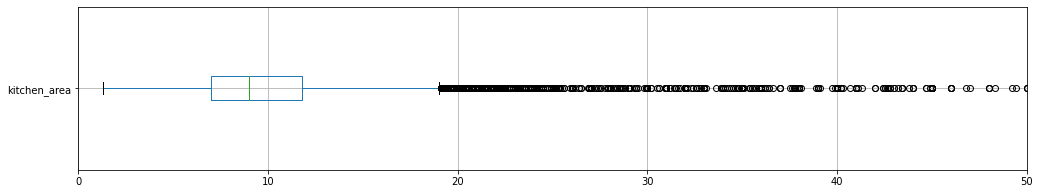

In [65]:
#площадь кухни
data.boxplot('kitchen_area', vert=False, figsize=(17,3)).set(xlim=(0,50))
data['kitchen_area'].describe()

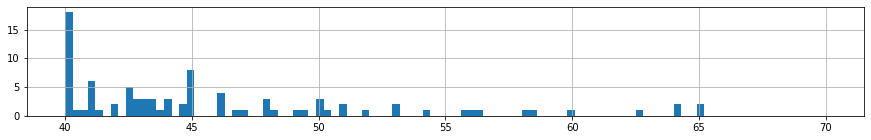

In [66]:
# check
data['kitchen_area'].hist(bins=100, figsize=(15,2), range=(40,70));
#data['kitchen_area'].hist(bins=100, figsize=(15,2), range=(0,10));

In [67]:
# delete
data = data.query('4 < kitchen_area < 55 | kitchen_area.isna()')

In [68]:
# check
data.shape[0]

22575

count    22575.000000
mean         0.598627
std          0.962856
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

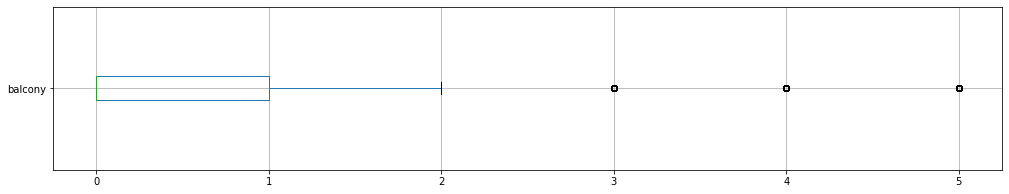

In [69]:
# балконы
data.boxplot('balcony', vert=False, figsize=(17,3))
data['balcony'].describe()

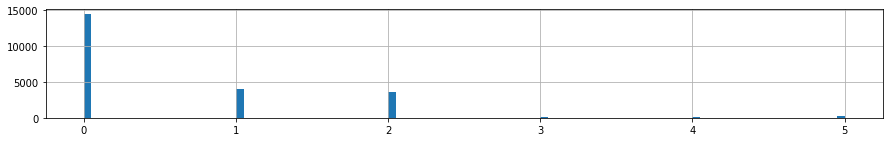

In [70]:
# check
data['balcony'].hist(bins=100, figsize=(15,2));

# чистить не буду, балконы во вменяемых количествах

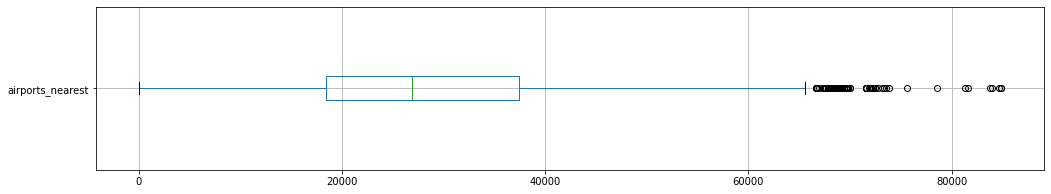

In [71]:
data.boxplot('airports_nearest', vert= False, figsize=(17,3));
# не буду ничего убирать. иначе получатся некорректные значения. населенный пункт же может быть в любом расстоянии от аэропорта
#data=data.query('airports_nearest < 80000')

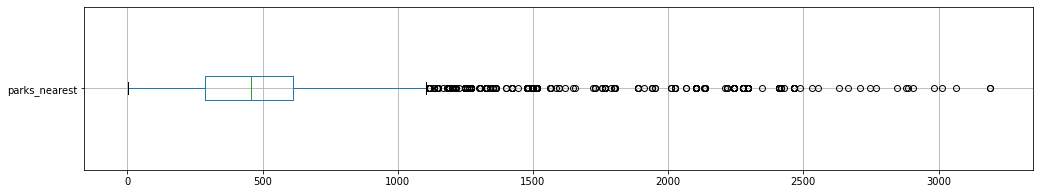

In [72]:
data.boxplot('parks_nearest', vert= False, figsize=(17,3));
# та же логика

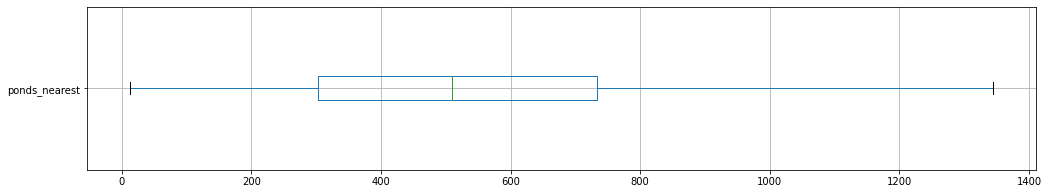

In [73]:
data.boxplot('ponds_nearest', vert= False, figsize=(17,3));
# то же

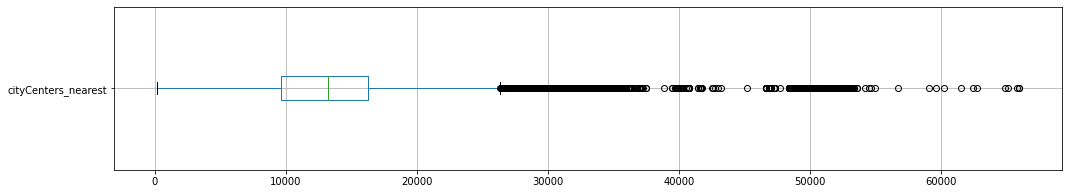

In [74]:
data.boxplot('cityCenters_nearest', vert= False, figsize=(17,3));
# то же

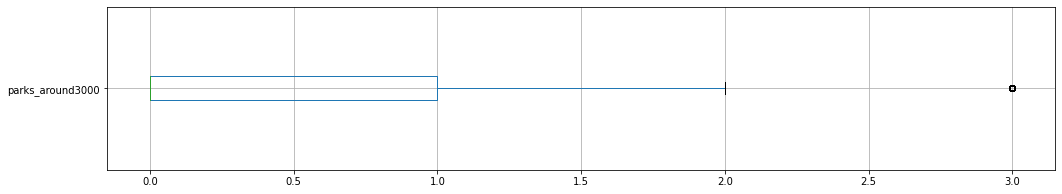

In [75]:
data.boxplot('parks_around3000', vert= False, figsize=(17,3));
# то же

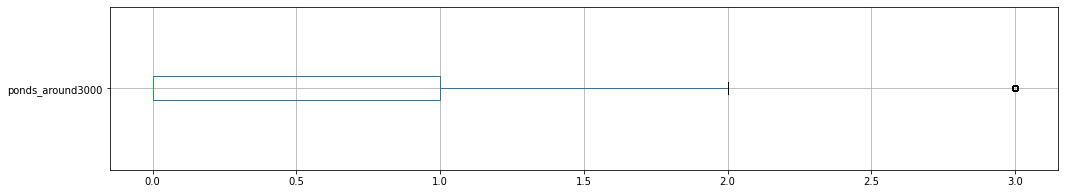

In [76]:
data.boxplot('ponds_around3000', vert= False, figsize=(17,3));

# удалять не буду

In [77]:
data['airports_nearest'] = data['airports_nearest']/1000
data['parks_nearest'] = data['parks_nearest'] / 1000
data['ponds_nearest'] = data['ponds_nearest'] / 1000
display(data.head())
# привели расстояние в метры


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18.863,16028.0,1.0,0.482,2.0,0.755,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,11.0,2.0,поселок Шушары,12.817,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21.741,13933.0,1.0,0.090,2.0,0.574,558.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31.856,8098.0,2.0,0.112,1.0,0.048,121.0
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,9.1,0.0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0


Исправили опечатки в столбце с балконами, привели столбцы с ближайшими парками, прудами, аэропортами из м в км, иначе по значениям трудно было назвать столбцы "ближайшими". Отбросили то, что отбрасывалось, но геоданные не трогали - населенный пункт же может быть на любом расстоянии от тех параметров, которые указаны в столбцах.

### Посчитайте и добавьте в таблицу новые столбцы

In [83]:
#добавим столбец стоимости одного квадратного метра
data['price_1_sq_m'] = data['last_price'] / data['total_area']
#далее:столбец года, месяца и дня публикации
data['year_of_first_day_exposition'] = data['first_day_exposition'].dt.year
data['month_of_first_day_exposition'] = data['first_day_exposition'].dt.month
data['day_of_first_day_exposition'] = data['first_day_exposition'].dt.dayofweek
print(data.head())
# посмотрела, вроде все норм

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1             NaN            11         18.6      1         False  ...   
2             NaN             5         34.3      4         False  ...   
4            3.03            14         32.0     13         False  ...   
5             NaN            12         14.4      5         False  ...   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          0

In [84]:
#проанализируем этажи и добавим новую колонку
def floors_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if 0 < floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    else:
        return 'другой'
data['type_of_floor'] = data.apply(floors_type, axis=1)
print(data.head(20))
        

    total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0       108.0           2019-03-07      3   
1              7   3350000.0        40.4           2018-12-04      1   
2             10   5196000.0        56.0           2015-08-20      2   
4              2  10000000.0       100.0           2018-06-19      2   
5             10   2890000.0        30.4           2018-09-10      1   
6              6   3700000.0        37.3           2017-11-02      1   
7              5   7915000.0        71.6           2019-04-18      2   
9             18   5400000.0        61.0           2017-02-26      3   
10             5   5050000.0        39.6           2017-11-16      1   
11             9   3300000.0        44.0           2018-08-27      2   
12            10   3890000.0        54.0           2016-06-30      2   
13            20   3550000.0        42.8           2017-07-01      2   
14             1   4400000.0        36.0           2016-06-23   

Нулевой добавила, про отрицательный не совсем поняла, вроде в датафрейме не было. Ну и они же автоматом теперь попадают в категорию "другой"???

In [85]:
#добавим колонку расстояния до центра и переведем из метров в км
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)
print(data.head())

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
4             2  10000000.0       100.0           2018-06-19      2   
5            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor  is_apartment  ...  \
0            2.70            16         51.0      8         False  ...   
1             NaN            11         18.6      1         False  ...   
2             NaN             5         34.3      4         False  ...   
4            3.03            14         32.0     13         False  ...   
5             NaN            12         14.4      5         False  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          0.482               2.0          0.755         

Добавили колонки с стоимостью одного квадратного метра, днем, месяцем и годом публикации объявления, выполнили категоризацию этажей, а также добавили колонку расстояния до центра города в км.

### Проведите исследовательский анализ данных

#### Изучаем параметры объектов:

count    22575.000000
mean        57.572816
std         24.998049
min         13.000000
25%         40.000000
50%         51.730000
75%         68.100000
max        199.200000
Name: total_area, dtype: float64

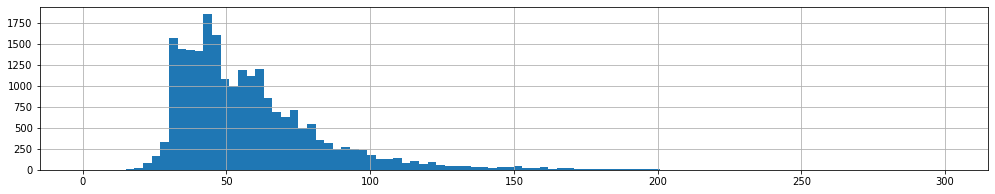

In [86]:
#изучаем колонку "общая площадь"
data['total_area'].hist(bins=100, range=(0, 300), figsize=(17,3));
data['total_area'].describe()

По гистограмме видно, что больше всего квартир с общей площадью от 40 до 50 кв м. И совсем мало с площадью более 100 кв м - либо дворцы либо выбросы...

count    20816.000000
mean        32.900715
std         16.395866
min         10.080000
25%         18.600000
50%         30.000000
75%         42.000000
max        147.000000
Name: living_area, dtype: float64

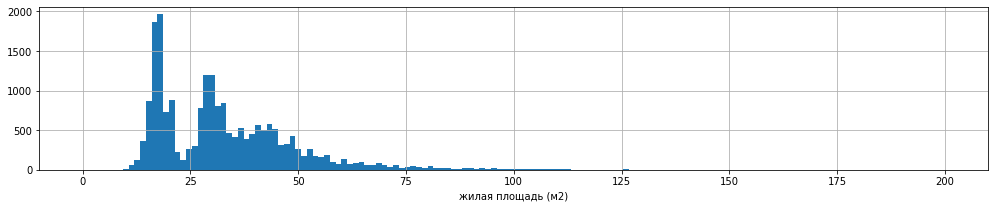

In [87]:
# жилая площадь
data['living_area'].hist(bins=150, range=(0,200),  figsize=(17,3))\
    .set_xlabel('жилая площадь (м2)')\
#     .set_title('');
data['living_area'].describe()

По гистограмме виден пик на 25-30 кв м, более 50 - совсем мало

count    20485.000000
mean        10.272788
std          4.940426
min          4.100000
25%          7.000000
50%          9.000000
75%         11.800000
max         54.200000
Name: kitchen_area, dtype: float64

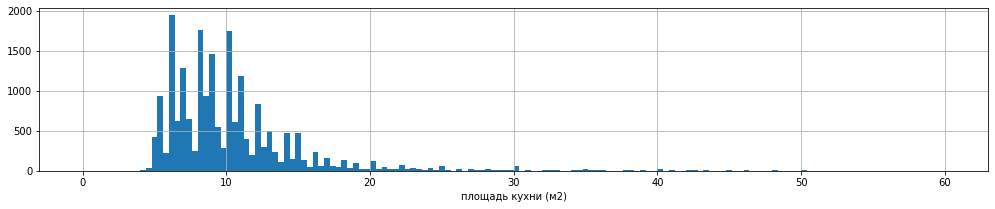

In [88]:
# площадь кухни
data['kitchen_area'].hist(bins=150, range=(0,60), figsize=(17,3)).set_xlabel('площадь кухни (м2)');
data['kitchen_area'].describe()

По графику видно, что преимущественно преобладают кухни с квадратурой 9-11 кв м

count    2.257500e+04
mean     5.788829e+06
std      4.211907e+06
min      1.010000e+06
25%      3.450000e+06
50%      4.600000e+06
75%      6.603500e+06
max      3.999000e+07
Name: last_price, dtype: float64

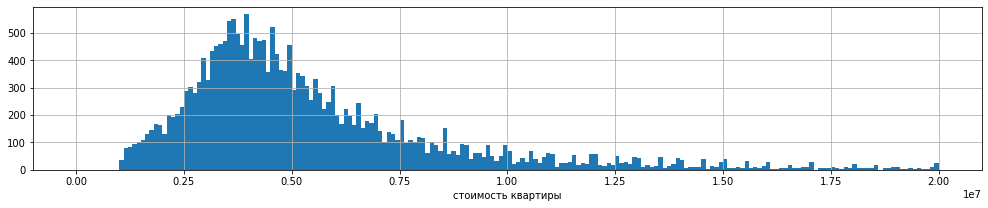

In [89]:
# цена
data['last_price'].hist(bins=200, range=(0,20000000), figsize=(17,3)).set_xlabel('стоимость квартиры');
data['last_price'].describe()

Самая популярная цена - 4 млн

count    22575.000000
mean         2.019491
std          0.956978
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: rooms, dtype: float64

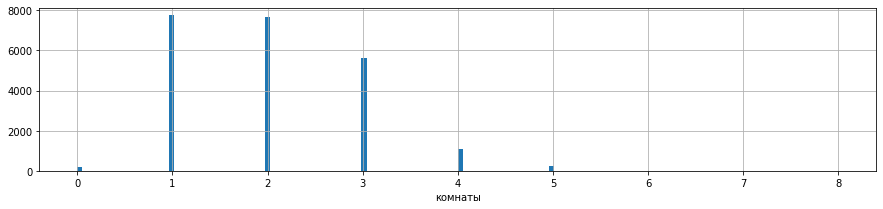

In [90]:
# комнаты
data['rooms'].hist(bins=150, range = (0, 8), figsize=(15,3)).set_xlabel('комнаты')
data['rooms'].describe()

Видно, что совсем на немного лидирует 1-комнатные квартиры, дальше двушки, ну а больше 5 комнат встречаются ооочень редко

count    13899.000000
mean         2.714677
std          0.258901
min          1.200000
25%          2.500000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

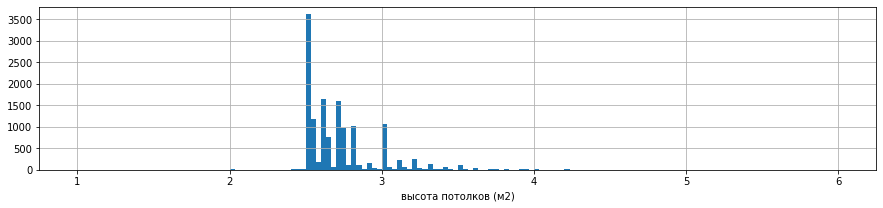

In [91]:
# потолки
data['ceiling_height'].hist(bins=150, range=(1,6), figsize=(15,3)).set_xlabel('высота потолков (м2)')
data['ceiling_height'].describe()

Видно, что самыми частовстречающимися потолками являются потолки с высотой 2.6 м, больше 4 - уже не так часто

count    22575.000000
mean         5.856080
std          4.747647
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         24.000000
Name: floor, dtype: float64

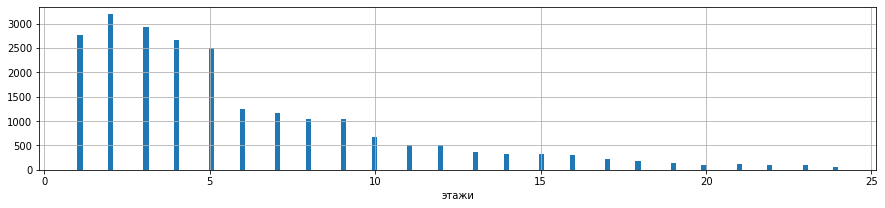

In [92]:
# этаж
data['floor'].hist(bins=150, figsize=(15,3)).set_xlabel('этажи')
data['floor'].describe()

Второй этаж чаще встречается в объявлениях, выше 20-го - редко

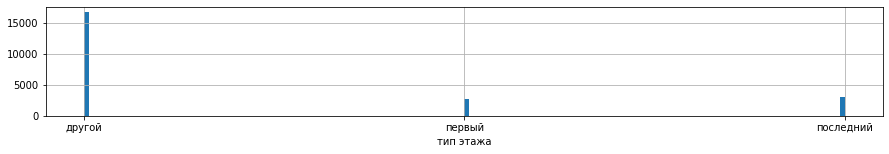

In [93]:
data['type_of_floor'].hist(bins=150, figsize=(15,2)).set_xlabel('тип этажа');

В лидерах не первый и не последний этаж

count    22575.000000
mean        10.737099
std          6.491773
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

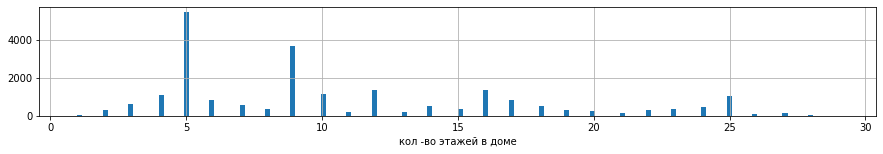

In [94]:
data['floors_total'].hist(bins=150, figsize=(15,2)).set_xlabel('кол -во этажей в доме');
data['floors_total'].describe()

Чаще всего в домах по 5 этажей - ожидаемо

count    17387.000000
mean     14366.632427
std       8577.439704
min        181.000000
25%       9607.500000
50%      13210.000000
75%      16316.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

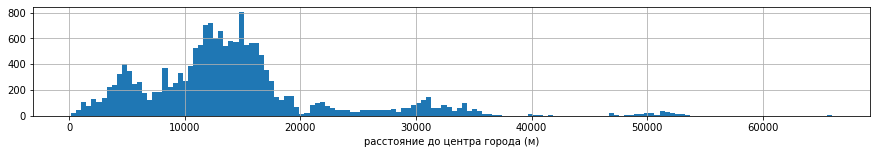

In [95]:
data['cityCenters_nearest'].hist(bins=150,  figsize=(15,2)).set_xlabel('расстояние до центра города (м)');
data['cityCenters_nearest'].describe()

чаще всего до центра около 13000-15000 метров

count    17367.000000
mean        28.837004
std         12.705077
min          0.000000
25%         18.428000
50%         26.911000
75%         37.407000
max         84.869000
Name: airports_nearest, dtype: float64

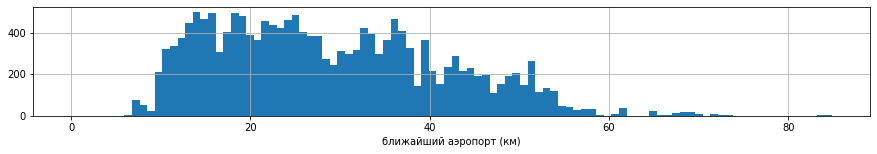

In [96]:
data['airports_nearest'].hist(bins=100, figsize=(15,2)).set_xlabel('ближайший аэропорт (км)');
data['airports_nearest'].describe()

 25 км чаще всего до аэропорта

count    7629.000000
mean        0.492952
std         0.341906
min         0.001000
25%         0.288000
50%         0.456000
75%         0.614000
max         3.190000
Name: parks_nearest, dtype: float64

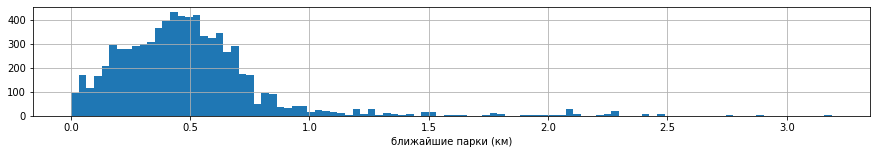

In [97]:
data['parks_nearest'].hist(bins=100, figsize=(15,2)).set_xlabel('ближайшие парки (км)');
data['parks_nearest'].describe()

а до парка всего 0.5 км чаще всего

count    22575.000000
mean         2.566290
std          1.789619
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: day_of_first_day_exposition, dtype: float64

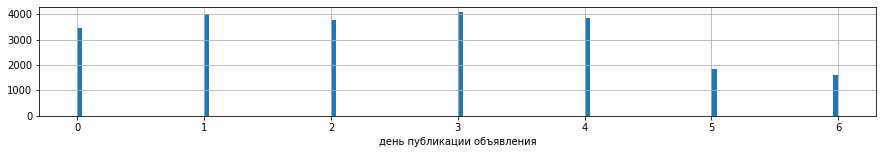

In [98]:
data['day_of_first_day_exposition'].hist(bins=150, figsize=(15,2)).set_xlabel('день публикации объявления');
data['day_of_first_day_exposition'].describe()

Больше всего объявлений даётся в четверг, ну и немногим меньше во вторник. В выходные меньше всего объявлений,а именно в вс, но это и логично: людям некогда)

count    22575.000000
mean         6.409081
std          3.492751
min          1.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         12.000000
Name: month_of_first_day_exposition, dtype: float64

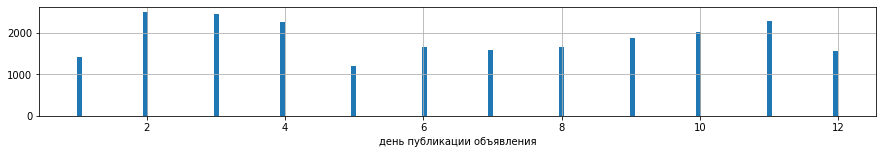

In [99]:
data['month_of_first_day_exposition'].hist(bins=150, figsize=(15,2)).set_xlabel('день публикации объявления');
data['month_of_first_day_exposition'].describe()

самым активным месяцем по публикации объявлений является февраль. Относительное затишье (меньше всего обявлений) в мае

#### Изучаем, как быстро продавались квартиры (столбец days_exposition)

174.20360443151068

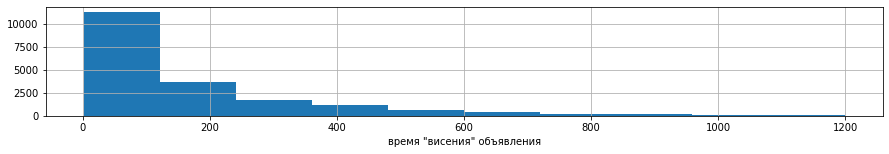

In [100]:
# построим гистограмму и найдем среднее
data['days_exposition'].hist(bins=10, figsize=(15,2)).set_xlabel('время "висения" объявления');
data['days_exposition'].mean()
# по гистограмме, конечно большинство за продажу в течение 100 дней
# а среднее говорит, что 174

In [101]:
#найдем медианну
data['days_exposition'].median()
data['days_exposition'].describe()
#data.boxplot('days_exposition')


count    19587.000000
mean       174.203604
std        205.077158
min          1.000000
25%         44.000000
50%         94.000000
75%        225.000000
max       1199.000000
Name: days_exposition, dtype: float64

В среднем, оказывается, объявление на сайте висит 174 дня. Максимум - 1199, минимум - 1. Те объявления, которые были на сайте больше 225 дней - можно назвать "долговисящими", а которые меньше 44 - "быстрыми".

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

            last_price
total_area            
13.0         1625000.0
13.2         1686000.0
15.0         1725000.0
16.0         2100000.0
17.0         1500000.0
...                ...
197.2       15000000.0
197.9       32238780.0
198.0       30489500.0
198.9       30000000.0
199.2       18924000.0

[1920 rows x 1 columns]


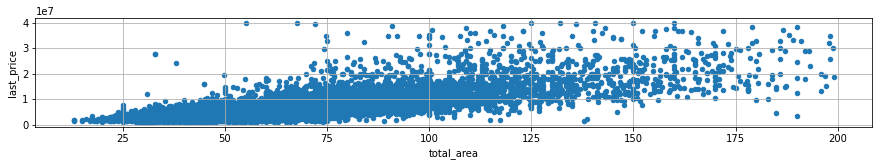

In [111]:
# смотрим зависимость цены от общей площади
price_and_area = data.pivot_table(index = 'total_area', values = 'last_price')
print(price_and_area)
#plot = data.boxplot('last_price', by = 'type_of_floor')
data.plot(x='total_area', y='last_price', kind='scatter', grid=True, figsize=(15,2));

и по таблице и по графику видно, что при увеличении площади квартиры - растет и цена.

               last_price
living_area              
10.08        3.250000e+06
10.30        6.050000e+06
10.40        3.941667e+06
10.50        6.545000e+06
10.52        3.797250e+06
...                   ...
130.00       3.300000e+07
140.00       2.115000e+07
142.00       1.800000e+07
145.40       1.500000e+07
147.00       3.497900e+07

[1561 rows x 1 columns]


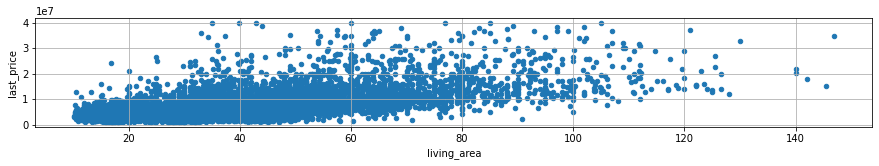

In [112]:
# смотрим зависимость цены от жилой площади
print(data.pivot_table(index='living_area', values='last_price'))
data.plot(x='living_area', y='last_price', kind='scatter', grid=True, figsize=(15,2));

при увеличении жилой площади - ценник также растет, очевидно

                last_price
kitchen_area              
4.1           3.336667e+06
4.2           2.762667e+06
4.3           2.400000e+06
4.4           1.800000e+06
4.5           2.550000e+06
...                    ...
50.2          1.350000e+07
51.0          2.066500e+07
51.8          3.250000e+07
53.0          2.086800e+07
54.2          2.450000e+07

[883 rows x 1 columns]


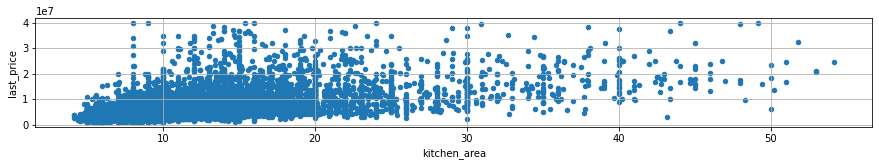

In [113]:
# смотрим зависимость цены от площади кухни
print(data.pivot_table(index='kitchen_area', values='last_price'));
data.plot(x='kitchen_area', y='last_price', kind='scatter', grid=True, figsize=(15,2));

та же тенденция, что и в первых двух пунктах.логично

         last_price
rooms              
0      3.003978e+06
1      3.862758e+06
2      5.532857e+06
3      7.601070e+06
4      1.066798e+07
5      1.337153e+07


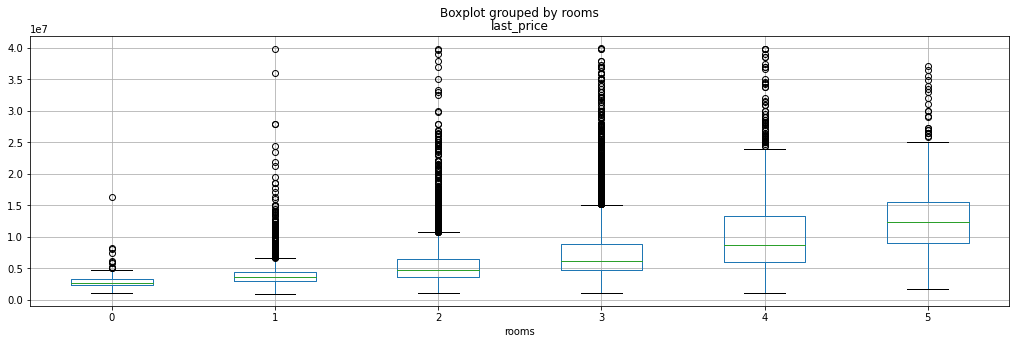

In [114]:
# смотрим зависимость цены от количества комнат
print(data.pivot_table(index='rooms', values='last_price'))
data.boxplot('last_price', by='rooms', figsize=(17,5));

Ожидаемо, что чем больше комнат - тем выше стоимость

                 last_price
type_of_floor              
другой         6.027186e+06
первый         4.581628e+06
последний      5.575446e+06


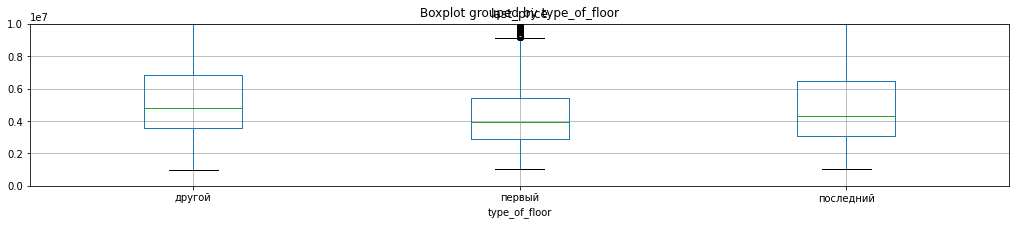

In [115]:
print(data.pivot_table(index='type_of_floor', values='last_price'))
data.boxplot('last_price', by='type_of_floor', figsize=(17,3)).set(ylim=(0,10000000));

Видно, что первый этаж - дешевле, чем остальные. Последний тоже ниже в цене, чем другие этажи. Вообщем, первый и последний этажи дешевле, нежели все остальные.

                                last_price
year_of_first_day_exposition              
2014                          9.341644e+06
2015                          6.614333e+06
2016                          5.838757e+06
2017                          5.684430e+06
2018                          5.609583e+06
2019                          6.121371e+06


[(2000000.0, 10000000.0)]

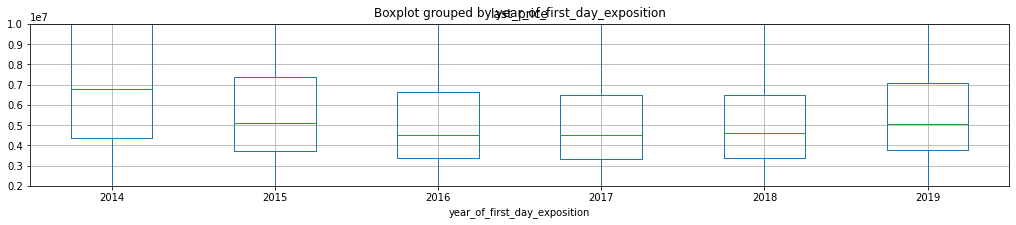

In [116]:
print(data.pivot_table(index='year_of_first_day_exposition', values='last_price'))
data.boxplot('last_price', by='year_of_first_day_exposition', figsize=(17,3)).set(ylim=(2000000,10000000))


стоимость квартир падала начиная с 2014 года, с 2017 года небольшой рост

                                 last_price
month_of_first_day_exposition              
1                              5.844532e+06
2                              5.779443e+06
3                              5.725522e+06
4                              5.803826e+06
5                              5.812310e+06
6                              5.647857e+06
7                              5.680941e+06
8                              5.839448e+06
9                              5.892917e+06
10                             5.707971e+06
11                             5.931459e+06
12                             5.791262e+06


[(2000000.0, 10000000.0)]

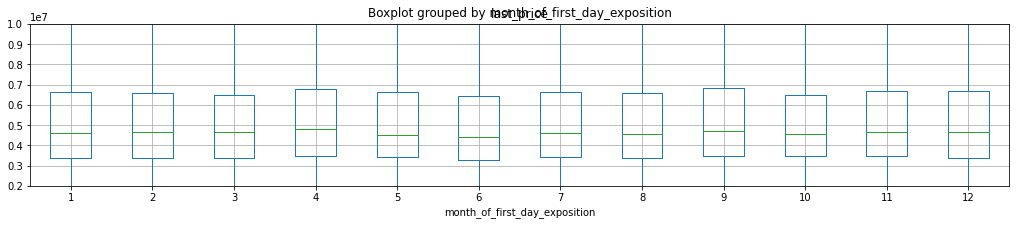

In [117]:
print(data.pivot_table(index='month_of_first_day_exposition', values='last_price'))
data.boxplot('last_price', by='month_of_first_day_exposition', figsize=(17,3)).set(ylim=(2000000,10000000))


Прям какой-то зависимости не вижу, но в сентябре - дороже всего продаются квартиры, в июне - дешевле

                               last_price
day_of_first_day_exposition              
0                            5.800471e+06
1                            5.749939e+06
2                            5.888995e+06
3                            5.921325e+06
4                            5.713986e+06
5                            5.618849e+06
6                            5.662871e+06


[(2000000.0, 10000000.0)]

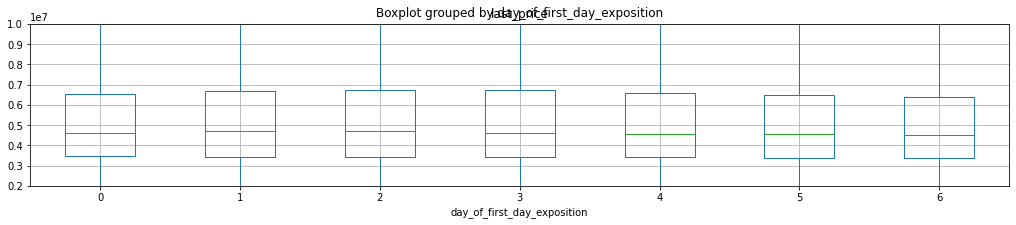

In [118]:
print(data.pivot_table(index='day_of_first_day_exposition', values='last_price'))
data.boxplot('last_price', by='day_of_first_day_exposition', figsize=(17,3)).set(ylim=(2000000,10000000))


особой зависимости также нет, но в чт немного меньше стоимость

In [119]:
# взглянем еще на корреляцию
#data_corr = data.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms', 'type_of_floor', 'year_of_first_day_exposition', 'month_of_first_day_exposition', 'day_of_first_day_exposition'])
print(data['last_price'].corr(data['total_area']))
print(data['last_price'].corr(data['living_area']))
print(data['last_price'].corr(data['kitchen_area']))
print(data['last_price'].corr(data['rooms']))

#тут видно, что от общей площади цена очень сильно зависит

0.7715088435424623
0.6583851335293166
0.5923369873848358
0.4656583824856718


итого: если судить по графикам, то больше всего на стоимость квартиры влияет естественно площадь квартиры, как общая, так и жилая и кухни, а также первый этаж - он дешевле всего. Остальные факторы не такие существенные

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [120]:
#посмотрим топ 10 городов по объявлениям
cities = data['locality_name'].value_counts().head(10)
print(cities)
list=["Санкт-Петербург", "поселок Мурино", "поселок Шушары", "Всеволожск", "Колпино", "Пушкин", "Гатчина", "поселок Парголово", "деревня Кудрово",  "Выборг"]

Санкт-Петербург      15034
поселок Мурино         526
поселок Шушары         434
Всеволожск             396
Пушкин                 356
Колпино                337
Гатчина                305
поселок Парголово      304
деревня Кудрово        296
Выборг                 231
Name: locality_name, dtype: int64


In [121]:
# отберем те данные из датафрейма, которые удовлетворяют условию: первая 10-ка городов с наибольшим кол-вом объявлений
new = data.query('locality_name == list')\
        .pivot_table(index = 'locality_name', values ='price_1_sq_m', aggfunc=('mean', 'median'))\
        .sort_values(by='mean', ascending=False)
new = new.round(decimals=2)
# округлила
print(new)

                        mean     median
locality_name                          
Санкт-Петербург    111443.69  104338.68
Пушкин             103010.45   99865.71
деревня Кудрово     92523.07   91930.23
поселок Парголово   90111.45   91780.22
поселок Мурино      85433.18   86093.53
поселок Шушары      78563.51   76876.17
Колпино             75333.30   74722.22
Гатчина             68947.38   67924.53
Всеволожск          68735.57   65789.47
Выборг              58690.35   58407.08


<AxesSubplot:ylabel='locality_name'>

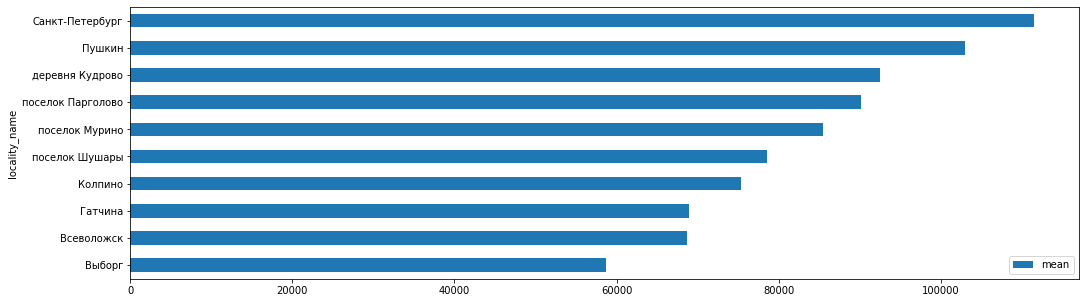

In [122]:
#new.boxplot('mean', by='locality_name', figsize=(10,10));
new.sort_values('mean', ascending = True)\
    .drop('median', axis=1)\
    .plot(kind='barh', figsize=(17,5))

По таблице и графику видно, что самая высокая стоимость за квадратный метр - в Санкт-Петербурге, ну а низкая - в Выборге. Ожидаемо, в столице всегда дороже, чем в области

#### Вычислите среднюю цену каждого километра в Санкт-Петербурге

In [123]:
data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=('mean', 'median'))\
        .sort_values(by='mean', ascending=False)

,mean,median
cityCenters_nearest_km,,
0.0,1.479883e+07,11500000.0
1.0,1.186537e+07,10000000.0
2.0,1.117280e+07,9350000.0
5.0,1.097648e+07,8900000.0
7.0,1.052235e+07,7250000.0
4.0,1.037388e+07,8750000.0
6.0,1.010069e+07,8150000.0
3.0,9.622219e+06,8200000.0
8.0,8.838863e+06,7300000.0


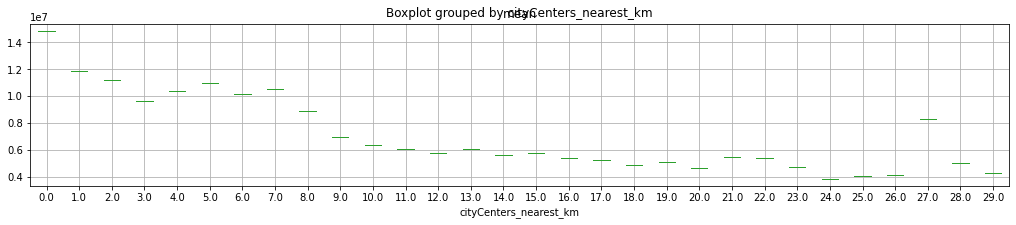

In [124]:
(data.query('locality_name == "Санкт-Петербург"')\
    .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=('mean', 'median'))\
        .sort_values(by='mean', ascending=False)).boxplot('mean', by='cityCenters_nearest_km', figsize=(17,3));

По полученным данным можно, сказать, что средняя стоимость квартиры в центре - дороже, чем на окраине.

### Общий вывод

Итого: изучались данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах. А именно была выполнена: 
- 1. предобработка данных: 
    - найдены и изучены пропущенные значения в столбцах: пропусков было много, где показалось уместным - пропуски были заменены (столбцы "балконы" , "апартаменты"). А в колонках, где их было мало -удалены. Геоданные заполнять чем-то смысла нет.
    - рассмотрены типы данных в каждом столбце (в трех изменены типы: столбец времени, столбец апартаменты и общее кол-во этажей)
    - изучены уникальные значения в столбце и устранены неявные дубликаты (в столбце названия местности было много названий с отличием лишь в е\ё и добавочных словах типа поселок, поселок городского типа, устранение убрало 43 повтора)
    - найдены и устранены редкие и выбивающиеся значения (построили боксплоты, гистограммы и смотрели данные методом describe(), все значения, которые были очень редкие или подозрительные, за усами ящика старалась убирать методом query(). Таким образом смогли понизить цену продажи с 6,5 мл до 5,9 млн, общую площадь с 60 до 58, жилую площадь с 34 до 33, дни, пока висело объявление с 180 до 174.)
    
 - 2. добавлены в таблицу новые столбцы с параметрами, которые пригодились для дальнейшей обработки в п.3 (например: столбцы дня и месяца и года публикации объявления, цена одного квадратного метра и другие...)
 
- 3. проведен исследовательский анализ данных:
    - изучены все параметры объектов, находящиеся в таблице. И по ним можно сделать такой вывод, что больше всего объявлений с такими параметрами:
            - общая площадь - 40-50 кв. м, жилая - 25-30, кухня - 9-11
            - стоимость - 4,5 млн рублей
            - 1- комнатные 
            - потолок 2.6 м
            - 2 этаж, но если брать по типам, то в лидерах - "другие", колонка объединяющая все этажи, кроме первого и последнего
            - обычно 5 этажей в доме
            - до центра 13-15 км
            - до аэропорта 25 км
            - а до парка 0.5 км
            - чаще всего объявления публикуются по четвергам и в феврале, а в вс и мае - затишье)
            
    - изучены, как быстро продавались квартиры (столбец days_exposition): в среднем объявление висит 174 дня, но бывает и дольше - вплоть до 1199, и меньше -1 день
    
    - изучены какие факторы больше всего влияют на общую (полную) стоимость объекта: больше всего на стоимость квартиры влияет естественно площадь квартиры, как общая, так и жилая и кухни, а также первый этаж - он дешевле всего. Остальные факторы не такие существенные.
    
    - посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений: лидер естественно Санкт-Петербург с ценой за 1 кв. м = 111443 руб, а самые дешевые квартиры - в Выборге с ценой = 58690. Ожидаемо, центр - всегда дороже, чем область.
    
    - вычислена средняя цена каждого километра для Санкт-Петербурга: в центре цена около 15 млн. На 27 км какое-то элитное жилье появилось с ценником= 8.3 млн, ну а в 29 км от центра уже всего 4.2 млн. Все хотят поближе к центру)))

   
